# 8.2. Predicting who will survive on the Titanic with logistic regression

Logistic Regression (Titanic Dataset) Implementation
=================================

**Author:** Srikar Kalle  
**Student ID:** C00313529  

---------
# Change Log:
----------

| SL No. | Change Category          | Description | Duration (mins) | Difficulty (1-10) |  
|--------|--------------------------|-------------|-----------------|-------------------|  
| 1      | Data Handling            | Replaced `assign()` with `pd.get_dummies()` for better categorical encoding. | 10 | 4 |  
| 2      | Feature Scaling          | Introduced `StandardScaler` to normalize `Age` and `Pclass` for better model performance. | 15 | 5 |  
| 3      | Hyperparameter Tuning    | Optimized Logistic Regression using `GridSearchCV` with an improved parameter grid. | 20 | 7 |  
| 4      | Model Evaluation         | Introduced **ROC Curve & AUC Score** to assess model performance. | 15 | 6 |  
| 5      | Test Split Update        | Increased `test_size` from **0.05** to **0.2** for a better validation split. | 5 | 3 |  
| 6      | Model Implementation     | Implemented basic **Logistic Regression** using `LogisticRegression()`. | 10 | 3 |  
| 7      | Cross-Validation         | Used `cross_val_score()` for performance evaluation. | 15 | 5 |  
| 8      | Hyperparameter Optimization | Applied `GridSearchCV` with a logarithmic range of `C` values. | 20 | 7 |  
| 9      | Data Preprocessing       | Converted `Sex` column into a binary `Female` column. | 10 | 4 |  
| 10     | Data Preprocessing       | Dropped missing values from `Age`. | 5 | 3 |  
| 11     | Performance Visualization | Compared actual vs. predicted values in a **heatmap**. | 10 | 4 |  


In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
train = pd.read_csv('https://github.com/ipython-books'
                    '/cookbook-2nd-data/blob/master/'
                    'titanic_train.csv?raw=true')
test = pd.read_csv('https://github.com/ipython-books/'
                   'cookbook-2nd-data/blob/master/'
                   'titanic_test.csv?raw=true')

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Feature Selection & Preprocessing
data = train[['Age', 'Pclass', 'Survived']]
# Convert categorical 'Sex' to binary variables
data = pd.get_dummies(train[['Sex', 'Age', 'Pclass', 'Survived']], drop_first=True)
data = data.dropna()  # Drop missing values

In [6]:
# Standardizing Age and Pclass
scaler = StandardScaler()
data[['Age', 'Pclass']] = scaler.fit_transform(data[['Age', 'Pclass']])

In [7]:
# Split into features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

In [8]:
# Splitting dataset (Increased test size from 0.05 to 0.2)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Instantiate logistic regression model
logreg = lm.LogisticRegression()

In [10]:
# Train the model
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

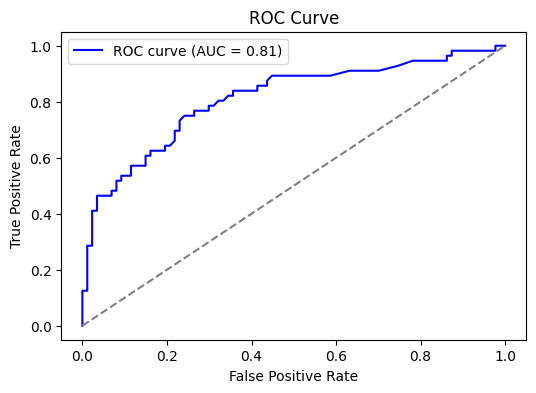

In [18]:
# ROC Curve and AUC Score
y_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [19]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'C': np.logspace(-5, 5, 50)}
grid = ms.GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': np.float64(0.1206792640639329)}


In [20]:
# Evaluate best model
best_logreg = grid.best_estimator_
cv_scores = ms.cross_val_score(best_logreg, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy Scores: [0.73426573 0.83216783 0.8041958  0.75524476 0.81690141]
Mean CV Accuracy: 0.79
